In [9]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [10]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [11]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [12]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [13]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(engine, reflect = True)


In [14]:
# View all of the classes that automap found
base.classes.keys()


['measurement', 'station']

In [43]:
# Save references to each table
Measurement = base.classes.measurement
Station = base.classes.station


In [44]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [45]:
#lets import inspector to find columns names and datatypes for each table

#measurement table

inspector = inspect(engine)
measurement_columns = inspector.get_columns("measurement")
for c in measurement_columns:
    print(c["name"], c["type"])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [46]:
#station table table

station_columns = inspector.get_columns("station")
for c in station_columns:
    print(c["name"], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [47]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).\
    order_by(Measurement.date.desc()).first()

print(most_recent_date)


('2017-08-23',)


In [48]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date

values = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-22').\
    order_by(Measurement.date).all()

values_dataframe = pd.DataFrame(values)
final_values_dataframe = values_dataframe.set_index("date")
final_values_dataframe

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


<function matplotlib.pyplot.show(close=None, block=None)>

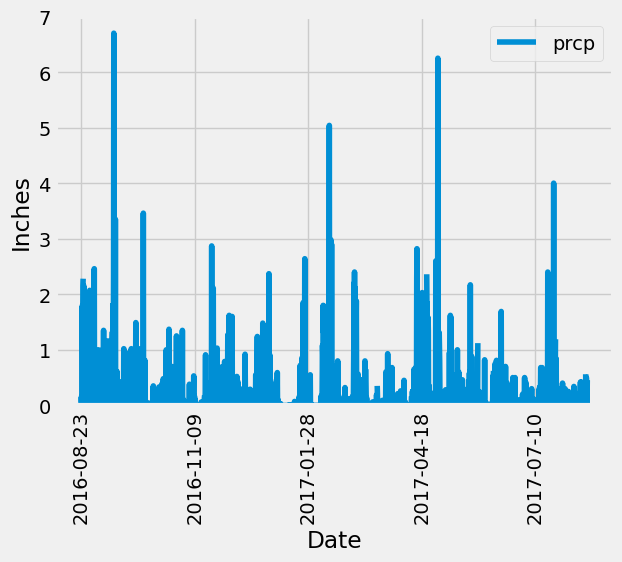

In [49]:
# Use Pandas Plotting with Matplotlib to plot the data
final_values_dataframe.plot()
plt.ylim(0,7)
plt.xticks(rotation = 90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.show

In [50]:
# Use Pandas to calculate the summary statistics for the precipitation data
final_values_dataframe.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [51]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(station.id).count()
total_stations

9

In [56]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station,func.count(Measurement.station)).\
    order_by(func.count(Measurement.station).desc()).\
    group_by(Measurement.station).all() 

print(active_stations) 

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [59]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature. 

# Most active station would be the first in a descending list of measurement station count - Station: USC00519281

most_active_station = session.query(Measurement.station,func.count(Measurement.station)).\
    order_by(func.count(Measurement.station).desc()).\
    group_by(Measurement.station).first()

# Isolate station number from this list of station numbers and count of stations
most_active_station_number = most_active_station[0]
#print(most_active_station_number) 

# Lowest temperature for most active station
lowest_temperature = session.query(func.min(Measurement.tobs)).\
  filter(Measurement.station==most_active_station_number).all()


# Highest temperature for most active station
highest_temperature = session.query(func.max(Measurement.tobs)).\
  filter(Measurement.station==most_active_station_number).all()

# Avg temperature for most active station
average_temperature = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station==most_active_station_number).all()

print(lowest_temperature, highest_temperature, average_temperature)

USC00519281
[(54.0,)] [(85.0,)] [(71.66378066378067,)]


In [62]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Find most recent date for Station: USC00519281 in the Measurement table

most_recent_date_station = session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.station == most_active_station_number).\
    order_by(Measurement.date.desc()).first()
print(most_recent_date_station)

('2017-08-18', 79.0)


In [70]:
# Create query saying to find dates 12 months before 2017-08-18 (thus > 2016-08-18), for the most active station
twelve_month_values = session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.station == most_active_station_number).\
    filter(Measurement.date > '2016-08-17').all()
#for value in twelve_month_values:
 #print(value)


(0.0, 70.0)

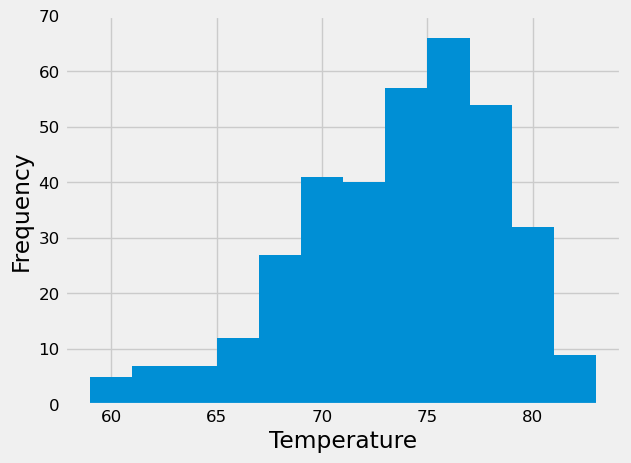

In [75]:

# Plotting
# Create series with just tobs from this 12 month period 
twelve_month_tobs_values_df = pd.DataFrame(twelve_month_values)["tobs"]
twelve_month_tobs_values_df 

hist = twelve_month_tobs_values_df.hist(bins=12) 
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,70)

# Close Session

In [76]:
# Close Session
session.close()